pip3 install libwwz

In [5]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [4]:
import pandas as pd
import numpy as np

import time
import os
import sys

In [32]:
#from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 

In [72]:
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# ztf

In [ ]:
def ztflc_show_in_jupyter(data,name,band, showtoday=False, show_upperlimits=False, formattime=True,
             marker="o", mec="0.7", ms=7, ecolor="0.7", ls="None", zorder=4, **kwargs):
        """ kwargs goes to matplotlib's errorbar() """
        FILTER_COLORS = ["C2","C3","C1"]
        FILTER_CODE   = ["zg","zr","zi"]
        save_name=name.strip().replace(' ','_')
        

        from astropy import time
        import matplotlib.pyplot as mpl

        # ----------- #
        # Global      #
        # ----------- #
        lc_dataframe = data
        prop = dict(marker=marker, mec=mec, ms=ms, ecolor=ecolor, ls=ls, zorder=zorder)

        # ----------- #
        #
        # ----------- #
        fig = mpl.figure(figsize=[7,4])
        ax = fig.add_axes([0.1,0.15,0.8,0.75])
        for filter_ in np.unique(lc_dataframe["filtercode"]):
            d = lc_dataframe[lc_dataframe["filtercode"]==filter_]
            if filter_ in FILTER_CODE:
                prop["color"] = np.asarray(FILTER_COLORS)[np.where(np.asarray(FILTER_CODE)==filter_)][0]
            else:
                prop["color"] = "0.7"

            if formattime:
                dates = time.Time(np.asarray(d["mjd"].values, dtype="float"), format="mjd").datetime
            else:
                dates = d["mjd"]
            ax.errorbar(dates, d["mag"], 
                                yerr=d["magerr"],
                                **{**prop,**kwargs})

        ax.invert_yaxis()
        
        if show_upperlimits:
            for filter_ in np.unique(lc_dataframe["filtercode"]):
                d = lc_dataframe[lc_dataframe["filtercode"]==filter_]
                if filter_ in FILTER_CODE:
                    color = np.asarray(FILTER_COLORS)[np.where(np.asarray(FILTER_CODE)==filter_)][0]
                else:
                    color = "0.7"

                if formattime:
                    dates = time.Time(np.asarray(d["mjd"].values, dtype="float"), format="mjd").datetime
                else:
                    dates = d["mjd"]
                    
                ax.errorbar(dates, d["limitmag"], 
                            yerr=0.1, lolims=True,marker="None", ls="None", 
                            color=color, alpha=0.1,
                            )

        if showtoday:
            today_color = "0.7"
            import datetime
            today = time.Time(datetime.date.today().isoformat(),format="iso").mjd
            ax.axvline(today, ls="--", color=today_color, zorder=1, lw=1)
            ax.text(today, ax.get_ylim()[0]-0.05, "Today", va="bottom", ha="right", rotation=90, color=today_color)

        if formattime:
            from matplotlib import dates as mdates            
            locator = mdates.AutoDateLocator()
            formatter = mdates.ConciseDateFormatter(locator)
            ax.xaxis.set_major_locator(locator)
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel("Date")
        else:
            ax.set_xlabel("MJD")
        # - Labels

        ax.set_ylabel("mag")
        ax.set_title('%s_%s'%(name,band))
               
        

In [ ]:
from ztfquery import lightcurve
#lcq = lightcurve.LCQuery.from_position(299.412,50.55500, 3)

In [ ]:
TMTS J035143.63+584504.2
(TMTS-BLAP-1)

In [ ]:
coord_TMTS_BLAP_1=SkyCoord('03h51m43.63s','+58d45m04.2s') #035143.63+584504.2

In [ ]:
ra,dec= coord_TMTS_BLAP_1.ra.deg,coord_TMTS_BLAP_1.dec.deg

In [ ]:
data_g = lightcurve.LCQuery.download_data(circle=[ra,dec,0.0014], bandname="g",BAD_CATFLAGS_MASK=32768)

In [ ]:
data_i = lightcurve.LCQuery.download_data(circle=[ra,dec,0.0014], bandname="i",BAD_CATFLAGS_MASK=32768)

In [ ]:
data_r = lightcurve.LCQuery.download_data(circle=[ra,dec,0.0014], bandname="r",BAD_CATFLAGS_MASK=32768)

In [ ]:
name='TMTS-BLAP-1'
band='g'
ztflc_show_in_jupyter(data_g,name,band)

In [ ]:
name='TMTS-BLAP-1-ztf'
band='r'
ztflc_show_in_jupyter(data_r,name,band)

In [ ]:
data_r.columns

In [ ]:
timestamp=data_r['mjd']
simple_signal=data_r['mag']
ntau=len(data_r['mjd'])

In [ ]:
min(timestamp),max(timestamp),ntau

In [ ]:
((59640-58216)/423)**-1

In [ ]:
1/1400*2

## TMTS-BLAP-1 ztf-r-wwz

In [ ]:
!pip3 install gatspy

In [ ]:
#from GATSPYmission import get_frequency_from_LombScargle
from gatspy import datasets, periodic

## def

In [7]:
from gatspy import periodic
def get_frequency_from_LombScargle(bjd, mag, mag_err=None,prange_min=1./24./60.*3,
                                       prange_max=1./24./60.*40.,):

    model = periodic.LombScargleFast(fit_period=True)
    model.optimizer.period_range = (prange_min,prange_max)
    model.fit(bjd, mag, dy=mag_err)
    p=model.best_period

    return 1./p

def get_c(tau,freq_lin):
    freq_c=(freq_lin[0]+freq_lin[1])/2.
    omega=2*np.pi*freq_c
    return 1./omega**2/(tau/2.)**2


def freq_estimate(time,magnitude,magnitude_error,f_width=0.003,f_resolution=0.0001):
    f=get_frequency_from_LombScargle(time, magnitude,mag_err=magnitude_error )
    f_lin=[f-f_width,f+f_width,f_resolution]
    print('The freq lin is estimated to {}'.format(f_lin))
    return f_lin


def _readfile(filepath):
    time, magnitude, magnitude_error= np.loadtxt(filepath,dtype=float,unpack=True,delimiter=',')
    time,magnitude,magnitude_error=time,magnitude,magnitude_error
    return time,magnitude,magnitude_error

In [44]:
def get_maxPower_freqs(wwz_2,freq_1D):
    maxPower_freqs=[]    
    print(wwz_2.shape[0])
    for i in range(wwz_2.shape[0]):
        maxindex=(wwz_2[i,:]).argmax()
        
        maxPower_freqs.append(freq_1D[maxindex]  )
    
    print('len(maxPower_freqs)',len(maxPower_freqs))
    maxPower_freqs=np.array(maxPower_freqs)
    return maxPower_freqs


data_r[['mjd','mag','magerr']].to_csv('ztf_data_r_mjd_mag_magerr.txt',header=None,index=False,)

In [102]:
name='TMTS-BLAP-1'
band='r'
#data=data_r
#timestamp=data_r['mjd']
#time=data_r['mjd']
#simple_signal=data_r['mag']
#magnitude=data_r['mag']
#magnitude_error= data_r['magerr']
timestamp,magnitude,magnitude_error=_readfile('ztf_data_r_mjd_mag_magerr.txt')

ntau=100

f_lin=freq_estimate(timestamp,magnitude,magnitude_error,f_width=30)

time_scale=600
#tau=time_scale

c=get_c(time_scale,f_lin)
print('The decay constant is set to {} when time scale is {} days.'.format(c,time_scale))



Finding optimal frequency:
 - Estimated peak width = 0.00441
 - Using 5 steps per peak; omega_step = 0.000882
 - User-specified period range:  0.0021 to 0.028
 - Computing periods at 3161452 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
The freq lin is estimated to [47.06431322336245, 107.06431322336245, 0.0001]
The decay constant is set to 4.739048233828132e-11 when time scale is 600 days.


In [103]:
f_lin

[47.06431322336245, 107.06431322336245, 0.0001]

In [109]:
(f_lin[0]+f_lin[1])/2

77.06431322336245

In [110]:
1/f_lin[0]*24*60,1/f_lin[1]*24*60, ((f_lin[0]+f_lin[1])/2)**-1*24*60

(30.596430742883815, 13.44985977723321, 18.6856917264197)

In [105]:
prange_min=1./24./60.*3
prange_max=1./24./60.*40.
print(prange_min,prange_max)

0.002083333333333333 0.027777777777777776


In [106]:
1/prange_min,1/prange_max

(480.0000000000001, 36.0)

Text(0, 0.5, 'Lomb Scargle Power')

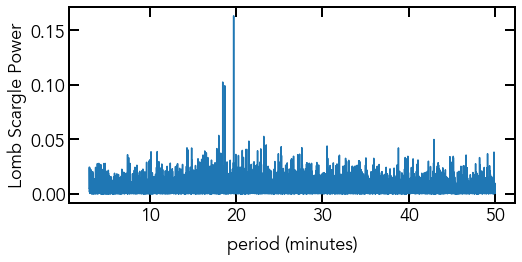

In [123]:
model = periodic.LombScargleFast()
model.fit(timestamp,magnitude,magnitude_error)

prange_min=1./24./60.*3.
prange_max=1./24./60.*50.
periods=np.linspace(prange_min,prange_max,10000)

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scores = model.score(periods)

# Plot the resultsa
fig, ax = plt.subplots(figsize=(8, 4))
fig.subplots_adjust(bottom=0.2)
ax.plot(periods*24*60, scores)

#ax.set(xlabel='period (days)', ylabel='Lomb Scargle Power',)
set_ax_tick(ax)
ax.set_xlabel('period (minutes)',labelpad=10)
ax.set_ylabel('Lomb Scargle Power')

In [10]:
print(ntau, f_lin, c)

100 [77.06131322336245, 77.06731322336245, 0.0001] 4.739048233828132e-11


timestamp,magnitude,magnitude_error

In [11]:
import time
# noinspection Mypy
import matplotlib.pyplot as plt
# noinspection Mypy
import numpy as np
import libwwz.wwz as wwz
import libwwz.plot_methods as wwz_plot

# Get the WWZ/WWA of the signals (linear)
# 'linear'
starttime = time.time()
WWZ_simple_linear = wwz.wwt(timestamp, magnitude, ntau, f_lin, c, 'linear')
print(round(time.time() - starttime, 2), 'seconds has passed (finished WWZ_simple_linear)')



*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.501
largest tau window is  5.749
17.4 seconds has passed to complete Weighted Wavelet Z-transform 

17.4 seconds has passed (finished WWZ_simple_linear)


In [83]:
f_lin[0]

[77.06131322336245, 77.06731322336245, 0.0001]

In [13]:
taus= WWZ_simple_linear[0]
freqs= WWZ_simple_linear[1]
wwz_2= WWZ_simple_linear[2]#wwz
freq_1D=freqs[0,:]
tau_1D=taus[:,0]

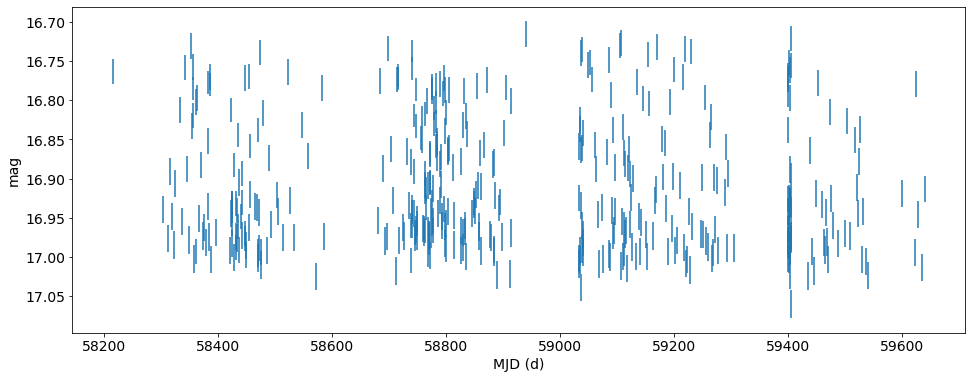

In [53]:
plt.rcParams["figure.figsize"] = [16, 6]
plt.rcParams.update({'font.size': 14})

# Plot of base functions
#plt.figure(0)
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.errorbar(x=timestamp,y=magnitude,yerr=magnitude_error,ls='')
#plt.plot(timestamp_removed, simple_removed, 'o')
plt.ylabel("mag")
#plt.legend(['full', 'removed'], loc=1, fontsize=10)
plt.xlabel("MJD (d)")

bottom, top = ax.set_ylim()
if bottom< top:
    ax.set_ylim(top,bottom)
    
#plt.suptitle('The simple signal (2 Hz)')

## plot_WWZ_LINEAR

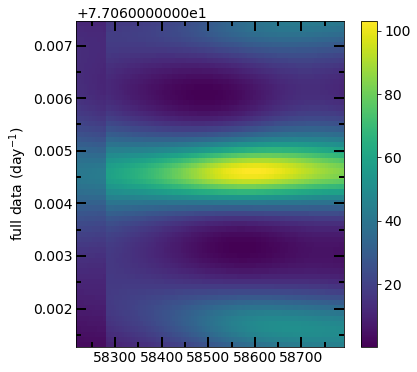

In [39]:
# Plot of WWZ for simple and simple removed
# 'linear'
fig, ax = plt.subplots(nrows=1, ncols=1)
wwz_plot.linear_plotter(ax=ax,#[0, 0],
                        TAU=WWZ_simple_linear[0],
                        FREQ=WWZ_simple_linear[1],
                        DATA=WWZ_simple_linear[2])
ax.set_ylabel(r'full data (day$^{-1}$)') #ax[0, 0]
#ax.set_xticks([])
#ax.set_yticks([1, 2, 3, 4, 5])
#ax.set_ylim(f_lin[0],f_lin[1])
ax.set_title('WWZ ztf-r ')
set_ax_tick(ax)
set_ax_locator(ax,100,50,0.001,0.0005)

In [30]:
min(timestamp),max(timestamp),max(timestamp)-min(timestamp)

(58216.1470486, 59640.2238542, 1424.0768055999943)

In [50]:
f_lin[0],f_lin[1],(f_lin[0]+f_lin[1])/2

(77.06131322336245, 77.06731322336245, 77.06431322336245)

In [45]:
maxPower_freqs=get_maxPower_freqs(wwz_2,freq_1D)

100
len(maxPower_freqs) 100


In [47]:
print(np.mean(maxPower_freqs),np.std(maxPower_freqs))

77.06457522336255 4.853864439965769e-05


In [46]:
print(maxPower_freqs)

[77.06451322 77.06451322 77.06451322 77.06451322 77.06451322 77.06451322
 77.06451322 77.06451322 77.06451322 77.06451322 77.06451322 77.06451322
 77.06451322 77.06451322 77.06451322 77.06451322 77.06451322 77.06451322
 77.06451322 77.06451322 77.06451322 77.06451322 77.06451322 77.06451322
 77.06451322 77.06451322 77.06451322 77.06451322 77.06451322 77.06451322
 77.06451322 77.06451322 77.06451322 77.06451322 77.06451322 77.06451322
 77.06451322 77.06451322 77.06461322 77.06461322 77.06461322 77.06461322
 77.06461322 77.06461322 77.06461322 77.06461322 77.06461322 77.06461322
 77.06461322 77.06461322 77.06461322 77.06461322 77.06461322 77.06461322
 77.06461322 77.06461322 77.06461322 77.06461322 77.06461322 77.06461322
 77.06461322 77.06461322 77.06461322 77.06461322 77.06461322 77.06461322
 77.06461322 77.06461322 77.06461322 77.06461322 77.06461322 77.06461322
 77.06461322 77.06461322 77.06461322 77.06461322 77.06461322 77.06461322
 77.06461322 77.06461322 77.06461322 77.06461322 77

In [51]:
1/77.06457522336255*24*60,1/77.06431322336245*24*60

(18.68562819980945, 18.6856917264197)

In [88]:
1/f_lin[0]*24*60,1/f_lin[1]*24*60

(18.68811672911517, 18.68326735298775)

# WWZ

## example

In [ ]:
"""
This module provides examples demonstrating the WWZ by looking at a simple signal (2 Hz).

Please select whether to run in parallel or not.
There are 'linear' method and 'octave' method.
current example showcases both methods

NOTE: The WWZ shows better information on frequency and WWA shows better information on amplitude.
"""

import time
# noinspection Mypy
import matplotlib.pyplot as plt
# noinspection Mypy
import numpy as np
import libwwz.wwz as wwz
import libwwz.plot_methods as wwz_plot

# Select Mode...
parallel = True

# number of time
ntau = 20  # Creates new time with this many divisions.

# linear
freq_low = 1
freq_high = 5
freq_steps = 0.2  # Resolution of frequency steps
freq_lin = [freq_low, freq_high, freq_steps]

# octave
freq_target = 2
freq_low = 0.5
freq_high = 6.5
band_order = 3
log_scale_base = 10**(3/10)
override = False
freq_oct = [freq_target, freq_low, freq_high, band_order, log_scale_base, override]

# decay constant  (c < 0.02) where c = 1/(2*w^2)
# The analyzing wavelet decays significantly in a single cycle 2*pi/w, where w = 2*pi*f
f = 2
w = 2 * np.pi * f
c = 1/(2*w**2)

# Code to remove data points at random

def remove_fraction_with_seed(data, fraction, seed=np.random.randint(1)):
    """
    removes fraction of data at random with given seed.
    :param data: data to remove
    :param fraction: fraction to remove
    :param seed: seed for randomness
    :return: data with fraction removed
    """
    n_to_remove = int(len(data) * fraction)
    np.random.seed(seed)

    return np.delete(data, np.random.choice(np.arange(len(data)), n_to_remove, replace=False))

In [ ]:
sample_freq = 80
timestamp = np.arange(0, 60, 1 / sample_freq)

# Create simple signal (2hz)
sine_2hz = np.sin(timestamp * 2 * (2 * np.pi))
simple_signal = sine_2hz

# Remove 80% of the signal at random
simple_removed = remove_fraction_with_seed(simple_signal, 0.8)
timestamp_removed = remove_fraction_with_seed(timestamp, 0.8)

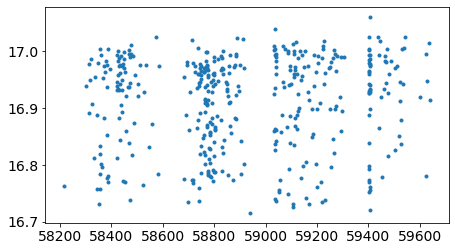

In [62]:
fig = plt.figure(figsize=[7,4])
ax= fig.add_axes([0.1,0.15,0.8,0.75])

ax.plot(timestamp, magnitude, ls='',marker='.')

In [ ]:



def run_examples() -> None:
    """
    An example of WWZ/WWA using a sine function time series with missing data will be shown.
    """

    # Set timestamps
    sample_freq = 80
    timestamp = np.arange(0, 60, 1 / sample_freq)

    # Create simple signal (2hz)
    sine_2hz = np.sin(timestamp * 2 * (2 * np.pi))
    simple_signal = sine_2hz

    # Remove 80% of the signal at random
    simple_removed = remove_fraction_with_seed(simple_signal, 0.8)
    timestamp_removed = remove_fraction_with_seed(timestamp, 0.8)

    # Get the WWZ/WWA of the signals (linear)
    # 'linear'
    starttime = time.time()
    WWZ_simple_linear = wwz.wwt(timestamp, simple_signal, ntau, freq_lin, c, 'linear')
    print(round(time.time() - starttime, 2), 'seconds has passed (finished WWZ_simple_linear)')
    WWZ_simple_removed_linear = wwz.wwt(timestamp_removed, simple_removed, ntau, freq_lin, c, 'linear')
    print(round(time.time() - starttime, 2), 'seconds has passed (finished WWZ_simple_removed_linear)')

    # 'octave'
    WWZ_simple_octave = wwz.wwt(timestamp, simple_signal, ntau, freq_oct, c, 'octave')
    print(round(time.time() - starttime, 2), 'seconds has passed (finished WWZ_simple_octave)')
    WWZ_simple_removed_octave = wwz.wwt(timestamp_removed, simple_removed, ntau, freq_oct, c, 'octave')
    print(round(time.time() - starttime, 2), 'seconds has passed (finished WWZ_simple_removed_octave)')

    # Plot
    plt.rcParams["figure.figsize"] = [14, 6]
    plt.rcParams.update({'font.size': 14})

    # Plot of base functions
    plt.figure(0)
    plt.plot(timestamp, simple_signal, '-')
    plt.plot(timestamp_removed, simple_removed, 'o')
    plt.ylabel("simple (count)")
    plt.legend(['full', 'removed'], loc=1, fontsize=10)
    plt.xlabel("time (s)")
    plt.suptitle('The simple signal (2 Hz)')

    # Plot of WWZ for simple and simple removed
    # 'linear'
    fig, ax = plt.subplots(nrows=2, ncols=2)
    wwz_plot.linear_plotter(ax=ax[0, 0],
                            TAU=WWZ_simple_linear[0],
                            FREQ=WWZ_simple_linear[1],
                            DATA=WWZ_simple_linear[2])
    ax[0, 0].set_ylabel('full data (Hz)')
    ax[0, 0].set_xticks([])
    ax[0, 0].set_yticks([1, 2, 3, 4, 5])
    ax[0, 0].set_title('WWZ')

    wwz_plot.linear_plotter(ax=ax[1, 0],
                            TAU=WWZ_simple_removed_linear[0],
                            FREQ=WWZ_simple_removed_linear[1],
                            DATA=WWZ_simple_removed_linear[2])
    ax[1, 0].set_ylabel('removed data (Hz)')
    ax[1, 0].set_xlabel('time (s)')
    ax[1, 0].set_yticks([1, 2, 3, 4, 5])

    # Plot of WWA for the same signal
    wwz_plot.linear_plotter(ax=ax[0, 1],
                            TAU=WWZ_simple_linear[0],
                            FREQ=WWZ_simple_linear[1],
                            DATA=WWZ_simple_linear[3])
    ax[0, 1].set_title('WWA')
    ax[0, 1].set_xticks([])
    ax[0, 1].set_yticks([])

    wwz_plot.linear_plotter(ax=ax[1, 1],
                            TAU=WWZ_simple_removed_linear[0],
                            FREQ=WWZ_simple_removed_linear[1],
                            DATA=WWZ_simple_removed_linear[3])
    ax[1, 1].set_xlabel('time (s)')
    ax[1, 1].set_yticks([])
    plt.suptitle('Linear Method')
    plt.tight_layout()

    # 'octave
    fig, ax = plt.subplots(nrows=2, ncols=2)
    wwz_plot.octave_plotter(ax=ax[0, 0],
                            TAU=WWZ_simple_octave[0],
                            FREQ=WWZ_simple_octave[1],
                            DATA=WWZ_simple_octave[2],
                            band_order=band_order,
                            log_scale_base=log_scale_base)
    ax[0, 0].set_ylabel('full data (Hz)')
    ax[0, 0].set_xticks([])
    ax[0, 0].set_title('WWZ')

    wwz_plot.octave_plotter(ax=ax[1, 0],
                            TAU=WWZ_simple_removed_octave[0],
                            FREQ=WWZ_simple_removed_octave[1],
                            DATA=WWZ_simple_removed_octave[2],
                            band_order=band_order,
                            log_scale_base=log_scale_base)
    ax[1, 0].set_ylabel('removed data (Hz)')
    ax[1, 0].set_xlabel('time (s)')

    # Plot of WWA for the same signal
    wwz_plot.octave_plotter(ax=ax[0, 1],
                            TAU=WWZ_simple_octave[0],
                            FREQ=WWZ_simple_octave[1],
                            DATA=WWZ_simple_octave[3],
                            band_order=band_order,
                            log_scale_base=log_scale_base)
    ax[0, 1].set_title('WWA')
    ax[0, 1].set_xticks([])
    ax[0, 1].set_yticks([])

    wwz_plot.octave_plotter(ax=ax[1, 1],
                            TAU=WWZ_simple_removed_octave[0],
                            FREQ=WWZ_simple_removed_octave[1],
                            DATA=WWZ_simple_removed_octave[3],
                            band_order=band_order,
                            log_scale_base=log_scale_base)
    ax[1, 1].set_xlabel('time (s)')
    ax[1, 1].set_yticks([])
    plt.suptitle('Octave Method')
    plt.tight_layout()
    
    #plt.show()
    plt.savefig('libwwz_example.png')


if __name__ == "__main__":
    run_examples()


In [ ]:
import libwwz
import time
# noinspection Mypy
import matplotlib.pyplot as plt
# noinspection Mypy
import numpy as np
import libwwz.wwz as wwz
import libwwz.plot_methods as wwz_plot